In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.vq as scivq
%matplotlib inline

Quick notebook to find a set of summary coefficients via k-means to describe a set of galaxies.  Data file is 5 weight coefficients that describe ~50,000 galaxy spectra, want a set of 100 spanning spectra based on these coefficients

In [2]:
numks = 100 #the number of k-means clusters to compute

In [3]:
infile = "galaxytraining_coefficients.out"
data = np.loadtxt(infile)

In [4]:
print (data.shape)
print data[0:3,:]

(51833, 6)
[[  0.00000000e+00   2.03370000e-06   1.73350000e-20   1.26310000e-06
    7.80030000e-05   5.45770000e-09]
 [  1.00000000e+00   2.08580000e-06   1.91220000e-30   3.05610000e-07
    3.18620000e-05   2.50430000e-13]
 [  2.00000000e+00   6.78710000e-06   2.27870000e-09   5.23410000e-07
    2.55240000e-05   6.28920000e-08]]


In [5]:
ids = data[:,0]
featurevec = data[:,1:]

In [6]:
normed = scivq.whiten(featurevec)

In [7]:
scalefactors = featurevec[0,:]/normed[0,:]
print (scalefactors)
#whiten does not save the scale factors after whitening the data, save them here, as the scale 
#factors are physically |meaningful!

[  2.25601680e-05   5.04325117e-09   2.82301443e-06   9.43230114e-05
   1.04597217e-06]


In [8]:
meancomponents = scivq.kmeans(normed,numks) #kmeans returns a tuple of (kmeans_comps,distortion)

In [9]:
finalkmeans = meancomponents[0]*scalefactors

In [10]:
ymin = 1.1*np.amin(featurevec[:,0])
ymax = 1.1*np.amax(featurevec[:,0])
print ymin,ymax

1.54143e-45 0.00115819


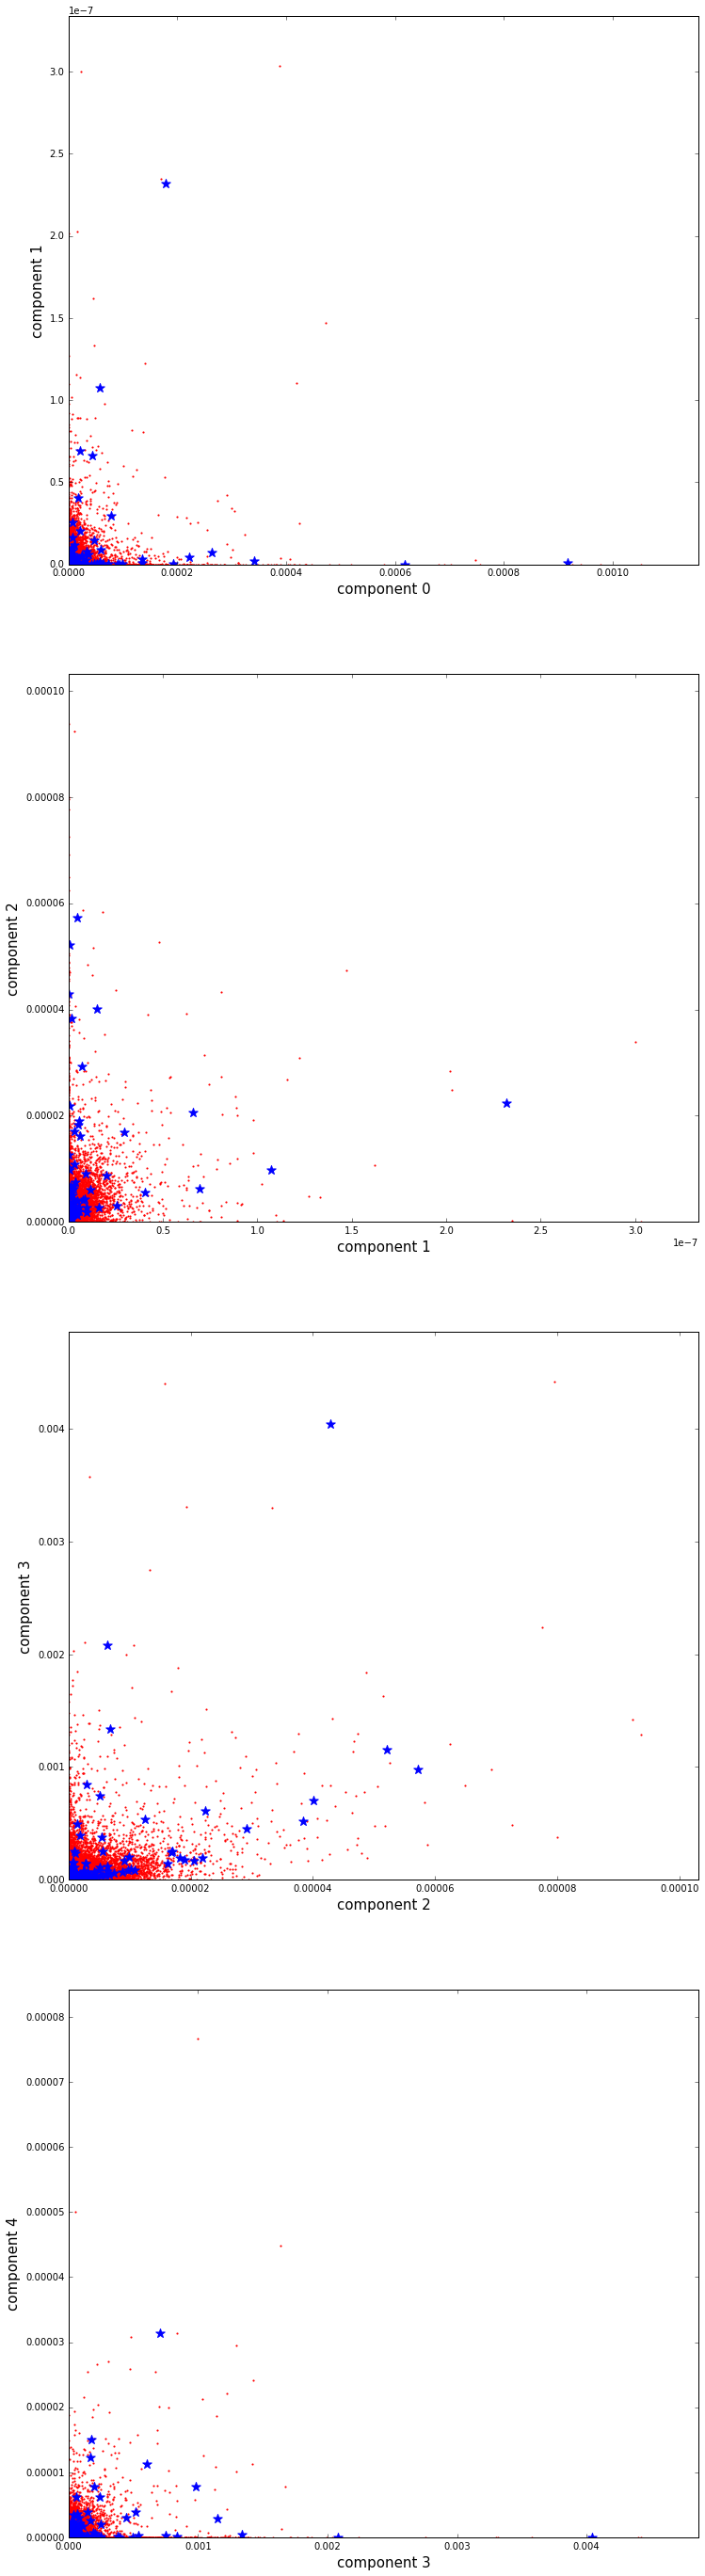

In [11]:
fig = plt.figure(figsize=(12,48))
ax = fig.add_subplot(411)
ax.scatter(featurevec[:,0],featurevec[:,1],c='r',edgecolor='r',s=5,marker='.')
ax.scatter(finalkmeans[:,0],finalkmeans[:,1],c='b',edgecolor='b',s=100,marker='*')
plt.xlabel("component 0",fontsize=15)
plt.ylabel("component 1",fontsize=15)
plt.xlim([0.0,np.amax(featurevec[:,0])*1.1])
plt.ylim([0.0,np.amax(featurevec[:,1]*1.1)])
bx = fig.add_subplot(412)
bx.scatter(featurevec[:,1],featurevec[:,2],c='r',edgecolor='r',s=5,marker='.')
bx.scatter(finalkmeans[:,1],finalkmeans[:,2],c='b',edgecolor='b',s=100,marker='*')
plt.xlabel("component 1",fontsize=15)
plt.ylabel("component 2",fontsize=15)
plt.xlim([0.0,np.amax(featurevec[:,1])*1.1])
plt.ylim([0.0,np.amax(featurevec[:,2]*1.1)])
cx = fig.add_subplot(413)
cx.scatter(featurevec[:,2],featurevec[:,3],c='r',edgecolor='r',s=5,marker='.')
cx.scatter(finalkmeans[:,2],finalkmeans[:,3],c='b',edgecolor='b',s=100,marker='*')
plt.xlabel("component 2",fontsize=15)
plt.ylabel("component 3",fontsize=15)
plt.xlim([0.0,np.amax(featurevec[:,2])*1.1])
plt.ylim([0.0,np.amax(featurevec[:,3]*1.1)])
dx = fig.add_subplot(414)
dx.scatter(featurevec[:,3],featurevec[:,4],c='r',edgecolor='r',s=5,marker='.')
dx.scatter(finalkmeans[:,3],finalkmeans[:,4],c='b',edgecolor='b',s=100,marker='*')
plt.xlabel("component 3",fontsize=15)
plt.ylabel("component 4",fontsize=15)
plt.xlim([0.0,np.amax(featurevec[:,3])*1.1])
plt.ylim([0.0,np.amax(featurevec[:,4]*1.1)])
plt.savefig("componentplots.jpg",fmt="jpg")

In [12]:
tmphead = "%d kmeans summary components determined from file %s"%(numks,infile)
np.savetxt("kmeans_coeffs.out",finalkmeans,fmt="%6.6g",header=tmphead)